In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
dataset_path_TRAIN = "./DATASET/TRAIN"
data_dir_TRAIN = pathlib.Path(dataset_path_TRAIN)
dataset_path_TEST = "./DATASET/TEST"
data_dir_TEST  = pathlib.Path(dataset_path_TEST)



In [3]:
batch_size = 64
img_height = 300
img_width = 300

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_TRAIN,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 22564 files belonging to 2 classes.


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_TEST,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2513 files belonging to 2 classes.


In [6]:
class_names = train_ds.class_names
print(class_names)

['O', 'R']


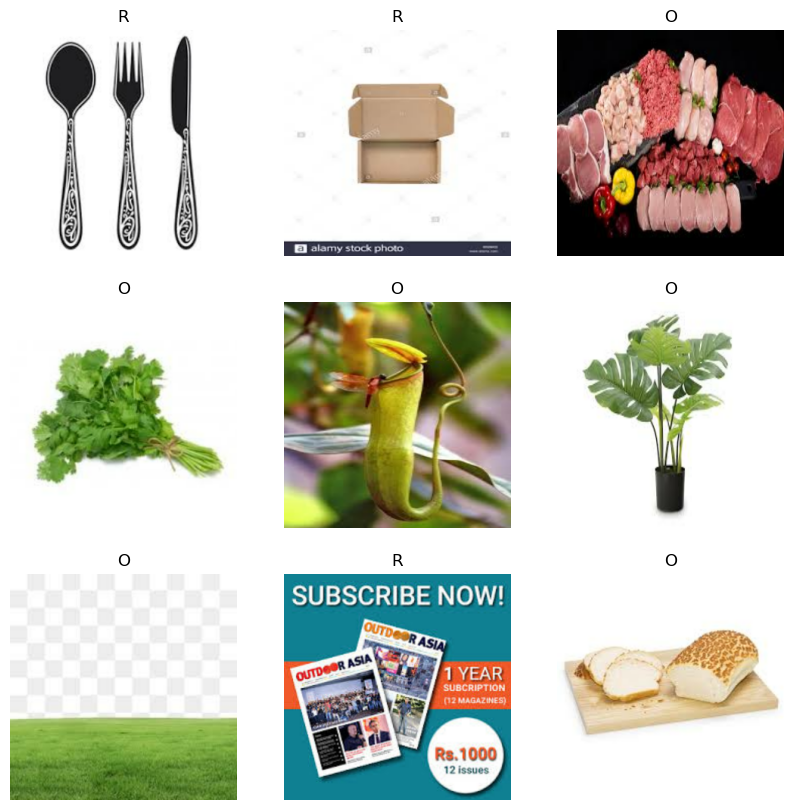

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(64, 300, 300, 3)
(64,)


In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
normalization_layer = layers.Rescaling(1./255)

In [11]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        1

In [14]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [15]:
epochs=2
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/2
353/353 [==============================] - 663s 2s/step - loss: 0.4400 - accuracy: 0.8164 - val_loss: 0.2924 - val_accuracy: 0.8930
Epoch 2/2
353/353 [==============================] - 581s 2s/step - loss: 0.3356 - accuracy: 0.8607 - val_loss: 0.3518 - val_accuracy: 0.8500


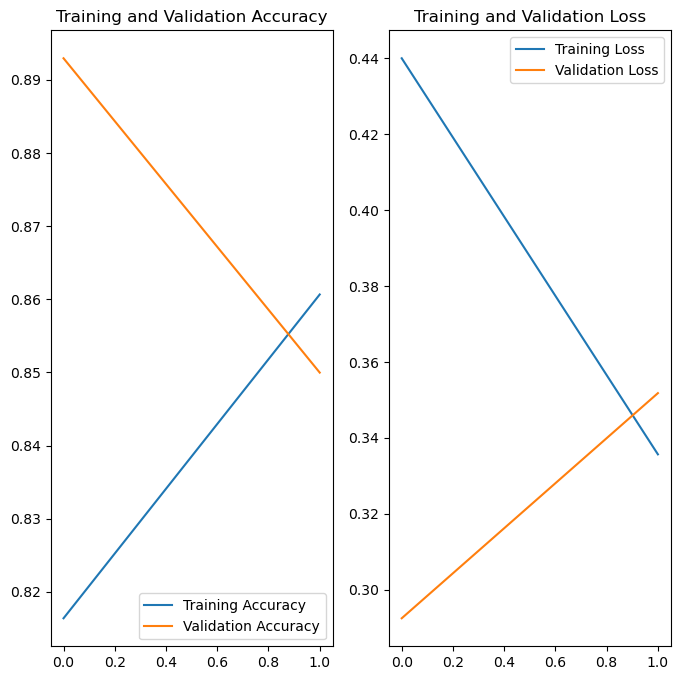

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [17]:
model.save('tensorflow.h5')

INFO:tensorflow:Assets written to: C:\Users\ARDI'S~1\AppData\Local\Temp\tmpeff80tee\assets


INFO:tensorflow:Assets written to: C:\Users\ARDI'S~1\AppData\Local\Temp\tmpeff80tee\assets
